<a href="https://colab.research.google.com/github/hasnaaitbenbrahim/CNNs_MLDL/blob/main/CNNs_MLDL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Artificial Intelligence Nanodegree

## Convolutional Neural Networks

---

In this notebook, we train a CNN to classify images from the CIFAR-10 database.

### 1. Load CIFAR-10 Database

In [26]:
import keras
from keras.datasets import cifar10

# load the pre-shuffled train and test data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

### 2. Visualize the First 36 Training Images

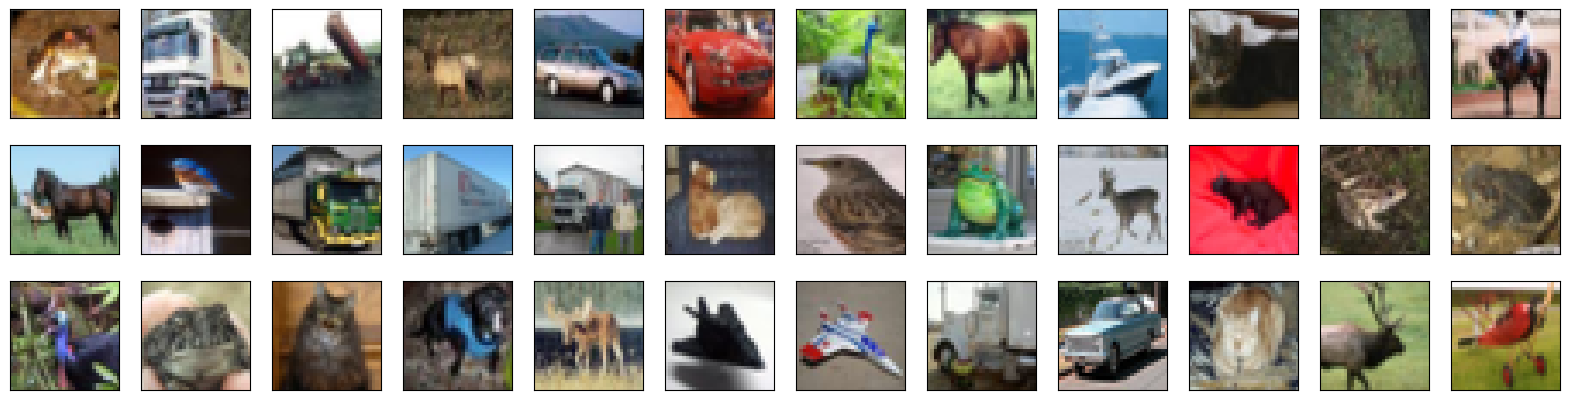

In [27]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(20,5))
for i in range(36):
    ax = fig.add_subplot(3, 12, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_train[i]))

### 3. Rescale the Images by Dividing Every Pixel in Every Image by 255

In [28]:
# rescale [0,255] --> [0,1]
x_train = x_train.astype('float32') / 255.0
x_test  = x_test.astype('float32') / 255.0
# ---- Normalisation par canal (image RGB) ----
mean = x_train.mean(axis=(0, 1, 2))
std  = x_train.std(axis=(0, 1, 2))

x_train = (x_train - mean) / std
x_test  = (x_test - mean) / std

print("Mean:", mean)
print("Std :", std)



Mean: [0.4914009  0.48215896 0.4465308 ]
Std : [0.24703279 0.24348423 0.26158753]


### 4.  Break Dataset into Training, Testing, and Validation Sets

In [29]:
from tensorflow.keras.utils import to_categorical


# one-hot encode the labels
num_classes = len(np.unique(y_train))
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# break training set into training and validation sets
(x_train, x_valid) = x_train[6000:], x_train[:6000]
(y_train, y_valid) = y_train[6000:], y_train[:6000]

# print shape of training set
print('x_train shape:', x_train.shape)

# print number of training, validation, and test images
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print(x_valid.shape[0], 'validation samples')

x_train shape: (44000, 32, 32, 3)
44000 train samples
10000 test samples
6000 validation samples


### 5. Define the Model Architecture

In [30]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()
# 1er couche convolutionnelle (capturer les motifs des images)
model.add(Conv2D(filters=20, kernel_size=3, padding='same', activation='relu',
                        input_shape=(32, 32, 3)))
# Réduire la taille des feature maps
model.add(MaxPooling2D(pool_size=3))

# 2éme couche convolutionnelle (Extraction de caractéristiques plus complexes)
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=3))

# 3éme couche convolutionnelle (Capture plus de motifs complexes)
model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=3))

# DropOut plus eleve pour eviter l'Overfitting
model.add(Dropout(0.5))

model.add(Flatten())

# Couche dense intermédiaire (Apprendre des combinaisons complexes des features extraites)
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.5))

# Pour obtenir la classe finale
model.add(Dense(10, activation='softmax'))

# Resumé sur l'architecture model
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 32, 32, 20)     │           560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 10, 10, 20)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 10, 10, 32)     │         5,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 3, 3, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 3, 3, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 1, 1, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 1, 1, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 500)            │        32,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │         5,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 62,358 (243.59 KB)

 Trainable params: 62,358 (243.59 KB)

 Non-trainable params: 0 (0.00 B)

### 6. Compile the Model

In [31]:
# compile the model
model.compile(loss='categorical_crossentropy', optimizer='rmsprop',
                  metrics=['accuracy'])

### 7. Train the Model

In [32]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath='model.weights.best.weights.h5',
                               verbose=1,
                               save_best_only=True,
                               save_weights_only=True)

# train the model
#checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose=1,
 #                              save_best_only=True)
hist = model.fit(x_train, y_train, batch_size=32, epochs=50,
          validation_data=(x_valid, y_valid), callbacks=[checkpointer],
          verbose=2, shuffle=True)


Epoch 1/50

Epoch 1: val_loss improved from inf to 1.36260, saving model to model.weights.best.weights.h5
1375/1375 - 42s - 31ms/step - accuracy: 0.3532 - loss: 1.7303 - val_accuracy: 0.4992 - val_loss: 1.3626
Epoch 2/50

Epoch 2: val_loss improved from 1.36260 to 1.23933, saving model to model.weights.best.weights.h5
1375/1375 - 38s - 28ms/step - accuracy: 0.4782 - loss: 1.4361 - val_accuracy: 0.5552 - val_loss: 1.2393
Epoch 3/50

Epoch 3: val_loss improved from 1.23933 to 1.16453, saving model to model.weights.best.weights.h5
1375/1375 - 36s - 26ms/step - accuracy: 0.5213 - loss: 1.3391 - val_accuracy: 0.5962 - val_loss: 1.1645
Epoch 4/50

Epoch 4: val_loss improved from 1.16453 to 1.13885, saving model to model.weights.best.weights.h5
1375/1375 - 36s - 26ms/step - accuracy: 0.5418 - loss: 1.2955 - val_accuracy: 0.6143 - val_loss: 1.1388
Epoch 5/50

Epoch 5: val_loss improved from 1.13885 to 1.11339, saving model to model.weights.best.weights.h5
1375/1375 - 37s - 27ms/step - accuracy

### 8. Load the Model with the Best Validation Accuracy

In [33]:
# load the weights that yielded the best validation accuracy
model.load_weights('model.weights.best.weights.h5')

### 9. Calculate Classification Accuracy on Test Set

In [34]:
# evaluate and print test accuracy
score = model.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.6348000168800354


### 10. Visualize Some Predictions

This may give you some insight into why the network is misclassifying certain objects.

In [35]:
# get predictions on the test set
y_hat = model.predict(x_test)

# define text labels (source: https://www.cs.toronto.edu/~kriz/cifar.html)
cifar10_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


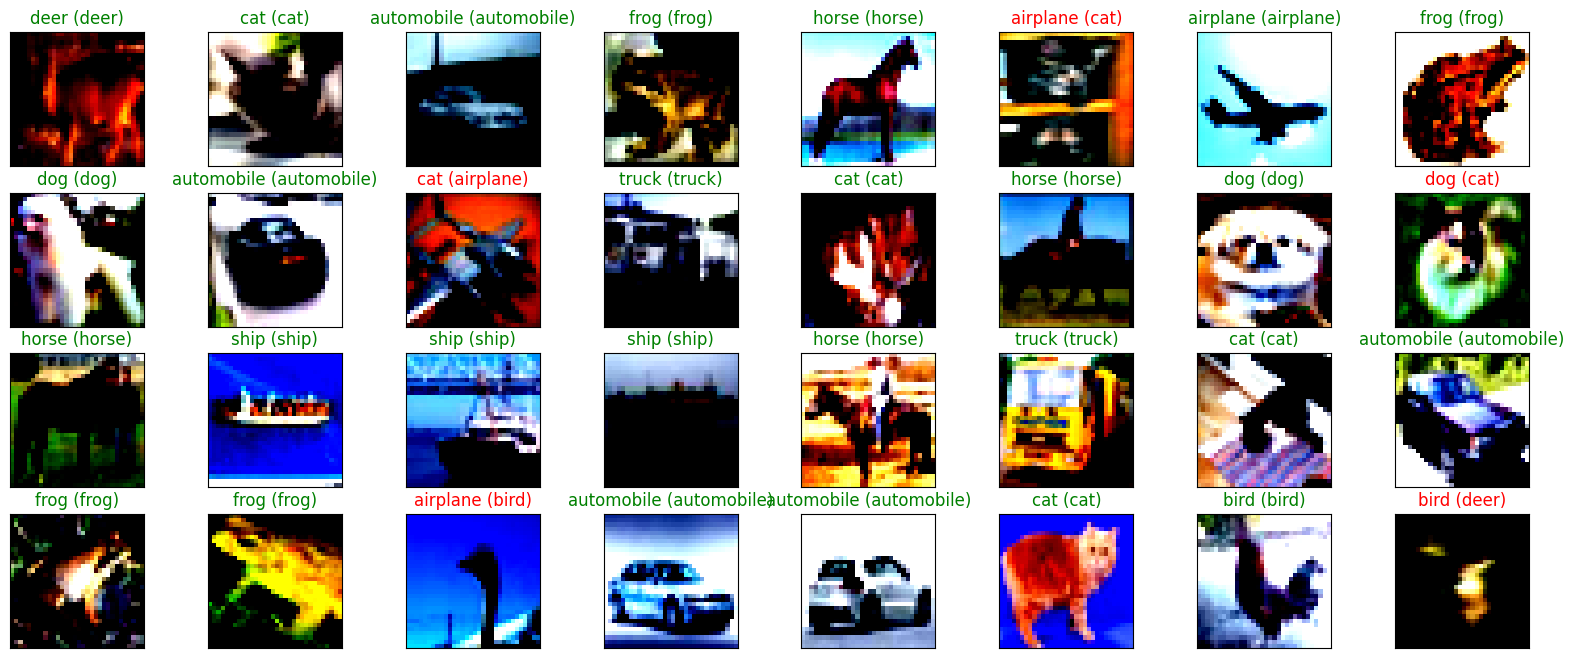

In [36]:
# plot a random sample of test images, their predicted labels, and ground truth
fig = plt.figure(figsize=(20, 8))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=32, replace=False)):
    ax = fig.add_subplot(4, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_hat[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(cifar10_labels[pred_idx], cifar10_labels[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))